In [1]:
import os, sys
from glob import glob
from utils import p2r, stack_features, word2sense, regression, cv_regression_w2s, image_to_tensor, Subject, listdir
import numpy as np
from tqdm import tqdm

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from collections import OrderedDict 
import string

In [7]:
# Setup w2s
w2s_file = "ThingsWrd2Sns.txt"
_, w2s_embeddings = word2sense(w2s_file)
nDim = 2250


# Cat's new word2vec (312 categories)
embedding_file = "ThingsWrd2Vec_subset.txt"
f = open(embedding_file, 'r', encoding='utf-8')
wordvec2lines = f.readlines()
f.close()


wordvec2 = {}

things = sorted(os.listdir('predicted_EVC_conv5'))

# Wordvec filtered by CM
for i, wv2 in enumerate(wordvec2lines):
    if i == 0:
        continue
    word = (wordvec2lines[i].split(','))[0]
    if word in w2s_embeddings:
        wordvec2[word] = wordvec2lines[i].split(',')[1:]
        wordvec2[word][-1] = wordvec2[word][-1].replace('\n', '')

for wv in wordvec2:
    wordvec2[wv] = np.array(wordvec2[wv]).astype(np.float)
    
print("wordvec2", len(wordvec2))

    
# dimensionality score
r_threshold_wordvec = p2r(0.05/300, len(wordvec2lines)-1)

nPC = 7;

wordvec2 312


In [16]:
# Stack data
rois = ['LOC', 'PPA', 'EVC'] 
layers = ['conv5', 'fc6'] #'conv1', 'conv5', 'fc6', 'conv1_r', 'conv5_r', 'fc6_r'
subjects = ['subj001/', 'subj002/', 'subj003/', 'subj004/'] #subj001/ , 'subj002/', 'subj003/', 'subj004/'
random_subjects = ['subj001_random/', 'subj002_random/', 'subj003_random/', 'subj004_random/']

weighttype = ["real", "random"]
predictpath = {
    "real": "predicted1023/predicted/",
    "random": "predicted1026weight2/"
}

# Initialize r values
roi_r_set = {}
random_r_set = {}

# Permutation repeated many times
# perm_r_set = []
# for i in range(1, 10):
#     weighttype.append("perm" + str(i))
#     predictpath["perm" + str(i)] = "predicted1023/predictedperm" + str(i) + "/"
#     perm_r_set.append({})

# print(weighttype)
# print(predictpath)


for weight in weighttype:
#     if weight == "random":
#         subjects = random_subjects
#     else:
#         subjects = ['subj001/', 'subj002/', 'subj003/', 'subj004/']
    for roi in rois:
        roi_r = []
        for layer in layers:
            sub_voxel_regressor = {}

            for subj in subjects:
                path = predictpath[weight]
                fmri_path = path + subj + roi + "_" + layer
                fmri_path = os.path.join(os.getcwd(), fmri_path) 

                conditions = sorted(listdir(fmri_path))
                condition_voxels = {}
                for condition in conditions:
                    if condition.split('/')[-1] in wordvec2.keys():
                        file_name = listdir((os.path.join(fmri_path, condition)))[0]
                        file_path = os.path.join(fmri_path, condition, file_name)
                        condition_voxels[condition] = np.load(file_path) 
                voxel_regressor = np.stack([condition_voxel for condition, condition_voxel in OrderedDict(condition_voxels).items()])
                sub_voxel_regressor[subj] = voxel_regressor

                print(sub_voxel_regressor[subj].shape)
            all_voxel_regressor = np.hstack([sub_voxel_regressor[s] for s in subjects])
            print(all_voxel_regressor.shape)

            for pc in tqdm(range(10, 80, 10), total=7, position=0, leave=True):
                _, voxel_mean_r = cv_regression_w2s(all_voxel_regressor, wordvec2, fit=None, k=9, l2=0.0, pc=pc)
                roi_r.append(voxel_mean_r)

            #if subj == 'random/':
            #random_r_set[roi] = roi_r
            #else:
            if weight == "real":
                roi_r_set[roi] = roi_r
            elif weight == "random":
                random_r_set[roi] = roi_r
            elif "perm" in weight:
                i = int(weight.strip(string.ascii_letters))
                print(i)
                perm_r_set[i][roi] = roi_r

(312, 195)
(312, 199)
(312, 199)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 793)


100%|██████████| 7/7 [00:01<00:00,  4.17it/s]


(312, 195)
(312, 199)
(312, 199)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 793)


100%|██████████| 7/7 [00:01<00:00,  4.38it/s]


(312, 200)
(312, 200)
(312, 200)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 800)


100%|██████████| 7/7 [00:01<00:00,  4.40it/s]


(312, 200)
(312, 200)
(312, 200)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 800)


100%|██████████| 7/7 [00:01<00:00,  3.93it/s]


(312, 200)
(312, 200)
(312, 200)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 800)


100%|██████████| 7/7 [00:01<00:00,  4.35it/s]


(312, 200)
(312, 200)
(312, 200)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 800)


100%|██████████| 7/7 [00:01<00:00,  4.15it/s]


(312, 195)
(312, 199)
(312, 199)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 793)


100%|██████████| 7/7 [00:01<00:00,  4.33it/s]


(312, 195)
(312, 199)
(312, 199)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 793)


100%|██████████| 7/7 [00:01<00:00,  4.44it/s]


(312, 200)
(312, 200)
(312, 200)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 800)


100%|██████████| 7/7 [00:01<00:00,  3.50it/s]


(312, 200)
(312, 200)
(312, 200)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 800)


100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


(312, 200)
(312, 200)
(312, 200)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 800)


100%|██████████| 7/7 [00:01<00:00,  3.74it/s]


(312, 200)
(312, 200)
(312, 200)


  0%|          | 0/7 [00:00<?, ?it/s]

(312, 200)
(312, 800)


100%|██████████| 7/7 [00:01<00:00,  4.40it/s]


In [12]:
#random_r_set = np.ndarray.tolist(np.load('results/random_r_set_face.npy', allow_pickle=True))
#roi_r_set = np.ndarray.tolist(np.load('results/allsubj_r_set.npy', allow_pickle=True))
#print(len(random_r_set['LOC']))
perm_r_set = np.load('perm_r_set_60.npy', allow_pickle=True)

In [19]:
print(roi_r_set['LOC'][0])

[ 0.25350161  0.21140216  0.172516    0.32707872  0.23162781  0.20938819
  0.28501683  0.11301136  0.36093935  0.11211592  0.26868472  0.22959647
  0.2151023   0.20995806  0.40155896  0.26021959  0.25150246  0.02472237
  0.26751627  0.1626123   0.36862582  0.19202656  0.25767727  0.16571947
  0.17053354  0.19643201  0.24078875  0.09617205  0.12661269  0.18850091
  0.17849964  0.07616042  0.17569668  0.17540929  0.09380345  0.28317818
  0.05771917  0.33634383  0.31431099  0.31228265  0.13706515  0.21632021
  0.10590433  0.27188819  0.06948024  0.24567248  0.19783455  0.20446235
  0.22367374  0.07713623 -0.04017683  0.14597348  0.20924695  0.27456703
  0.09959117  0.05652427  0.06450746  0.12069458  0.23293887  0.23801684
  0.12334186  0.04988314  0.24248787  0.12819293  0.23390613  0.40476647
  0.16931855  0.22484643  0.26169104  0.17084639  0.2536794   0.16184106
  0.45715861  0.22177967  0.16967863  0.07962205  0.26331757  0.28504885
  0.28053867  0.32662277  0.44444326  0.22909875  0

In [25]:
# Compute alternate metrics for semantic dimensionality score

roi_dim_set = {}
roi_max_set = {}
roi_mean_set = {}
roi_med_set = {}

for roi in rois:
    roi_dim = []
    roi_max = []
    roi_mean = []
    roi_med = []
    for dim_pred in roi_r_set[roi]:
        dim_pred = np.array(dim_pred)
        dim_pred_score = np.sum(dim_pred > r_threshold_wordvec)
        dim_max = np.nanmax(dim_pred)
        dim_mean = np.nanmean(np.array(dim_pred))
        dim_med = np.nanmedian(np.array(dim_pred))
        roi_dim.append(dim_pred_score)
        roi_max.append(dim_max)
        roi_mean.append(dim_mean)
        roi_med.append(dim_med)
    roi_dim_set[roi] = roi_dim
    roi_max_set[roi] = roi_max
    roi_mean_set[roi] = roi_mean
    roi_med_set[roi] = roi_med

random_dim_set = {}
random_max_set = {}
random_mean_set = {}
random_med_set = {}

for roi in rois:
    random_dim = []
    random_max = []
    random_mean = []
    random_med = []
    for dim_pred in random_r_set[roi]:
        dim_pred = np.array(dim_pred)
        dim_pred_score = np.sum(dim_pred > r_threshold_wordvec)
        dim_max = np.nanmax(dim_pred)
        dim_mean = np.nanmean(np.array(dim_pred))
        dim_med = np.nanmedian(np.array(dim_pred))
        random_dim.append(dim_pred_score)
        random_max.append(dim_max)
        random_mean.append(dim_mean)
        random_med.append(dim_med)
    random_dim_set[roi] = random_dim 
    random_max_set[roi] = random_max
    random_mean_set[roi] = random_mean
    random_med_set[roi] = random_med
    
# perm_dim_set = []
# perm_max_set = []
# perm_mean_set = []
# perm_med_set = []
# for i in range(50):

#     perm_dim_set.append({})
#     perm_max_set.append({})
#     perm_mean_set.append({})
#     perm_med_set.append({})

#     for roi in rois:
#         perm_dim = []
#         perm_max = []
#         perm_mean = []
#         perm_med = []
#         for dim_pred in perm_r_set[i][roi]:
#             dim_pred = np.array(dim_pred)
#             dim_pred_score = np.sum(dim_pred > r_threshold)
#             dim_max = np.nanmax(dim_pred)
#             dim_mean = np.nanmean(np.array(dim_pred))
#             dim_med = np.nanmedian(np.array(dim_pred))
#             perm_dim.append(dim_pred_score)
#             perm_max.append(dim_max)
#             perm_mean.append(dim_mean)
#             perm_med.append(dim_med)
#         perm_dim_set[i][roi] = perm_dim 
#         perm_max_set[i][roi] = perm_max
#         perm_mean_set[i][roi] = perm_mean
#         perm_med_set[i][roi] = perm_med

TypeError: list indices must be integers or slices, not str

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


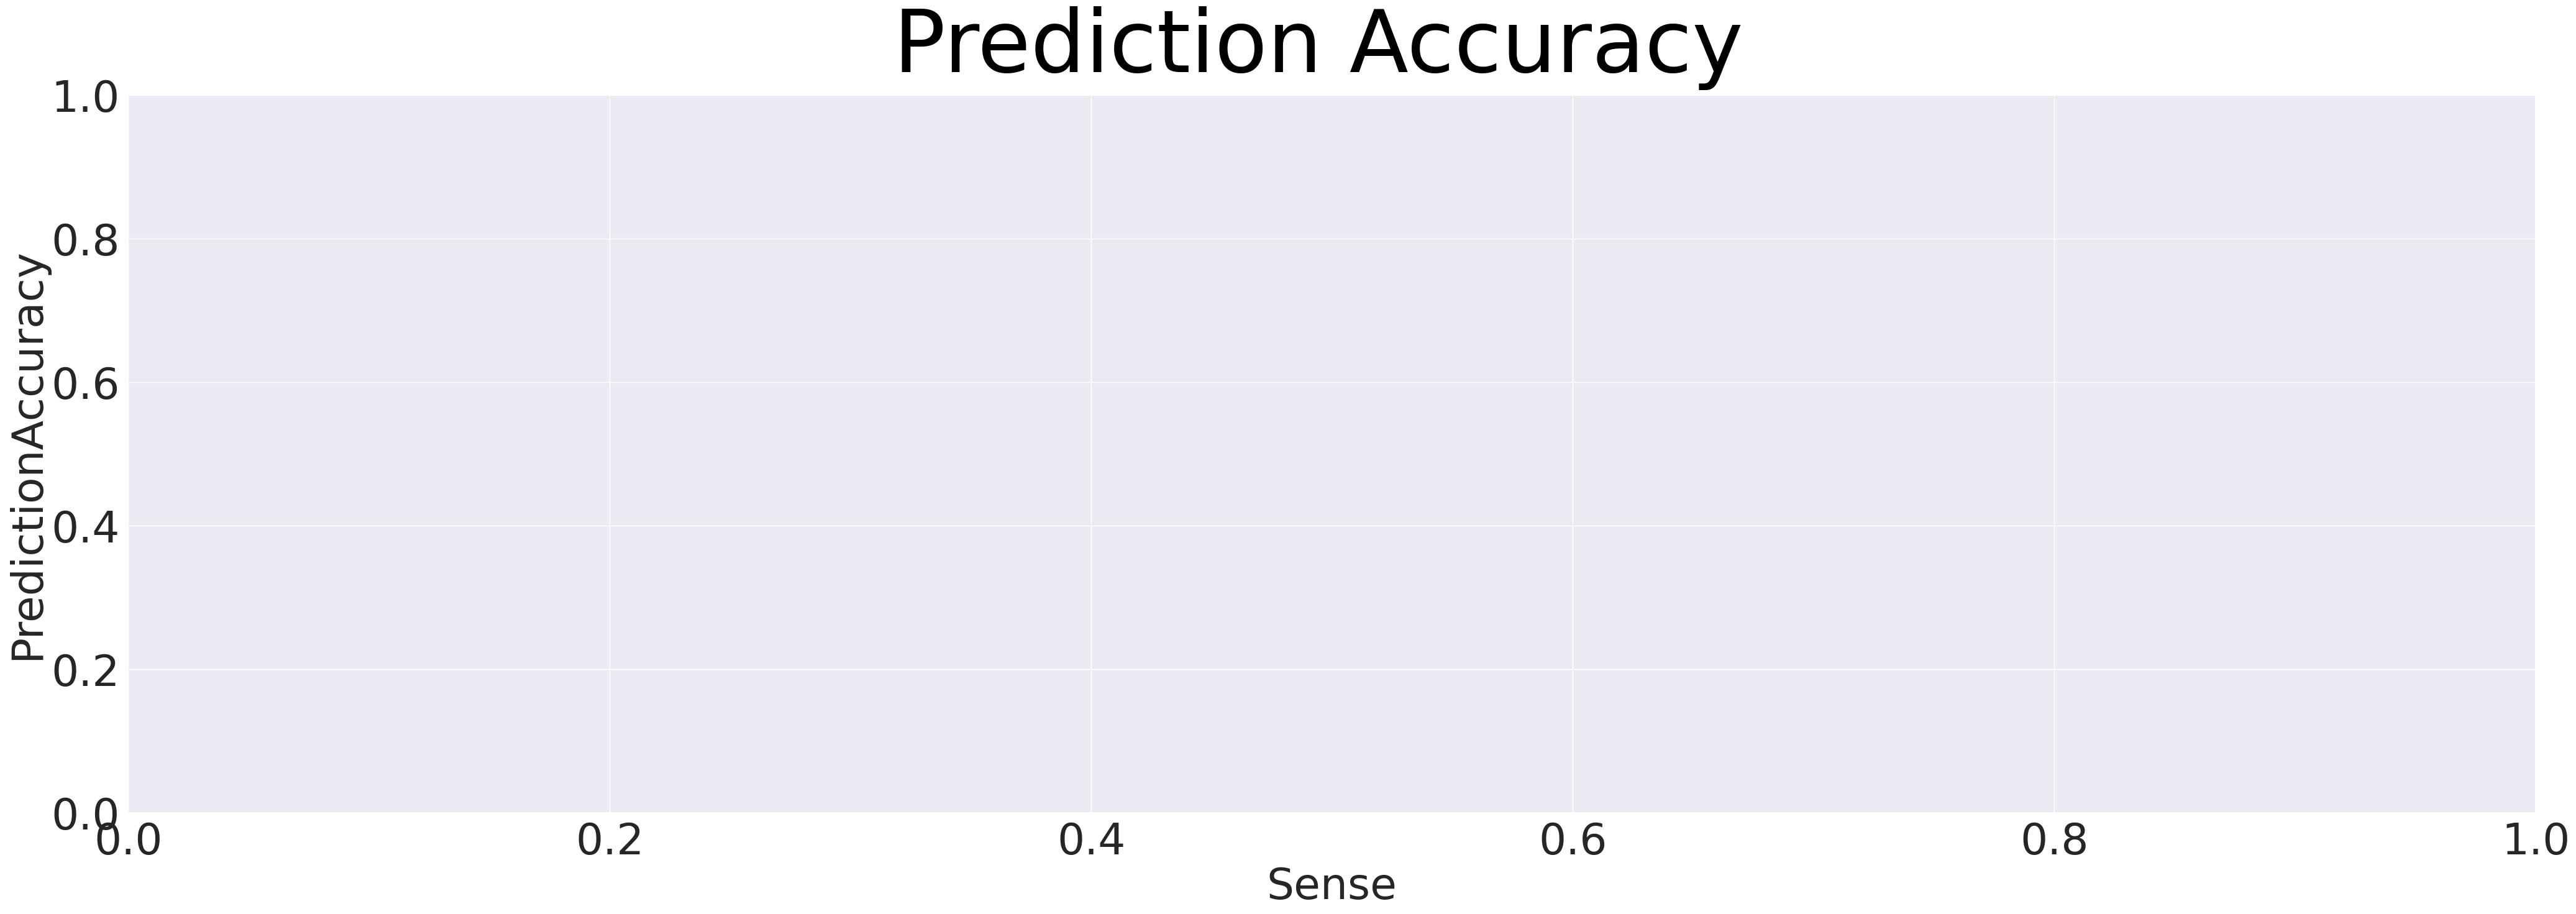

In [26]:
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

for pc in range(10, 80, nPC):
    plt.figure(figsize=(50,15))
    # Set the font dictionaries (for plot title and axis titles)
    title_font = {'fontname':'Arial', 'size':'100', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'50'}
    sns.set()
    #n= len(~np.isnan(mean_r))-1
    n= 2250-1

    #mean_r_nonan = mean_r[~np.isnan(mean_r)]
    #print(len(mean_r[~np.isnan(mean_r)]))
    ax = plt.subplot() # Defines ax variable by creating an empty plot
    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(50)
    plt.xlabel('Sense', **axis_font)
    plt.ylabel('PredictionAccuracy', **axis_font)
    plt.title("Prediction Accuracy ", **title_font)

    #Plot the Image!
    # plt.bar(range(0,n), np.sort(mean_r[0:n]), color = 'darkred')

    #plt.bar(range(0,2250), np.sort(mean_r_set[i])[::-1], color=cm.jet(1.*i/len(mean_r_set)), alpha=0.2)
    #plt.bar(range(0,2250), np.sort(mean_r_set[i])[::-1], color=cm.jet(1.*i/len(mean_r_set)), alpha=0.2)
    i = int(pc/10 - 1)
    
    plt.bar(range(0,2250), np.sort(perm_r_set['LOC'][i])[::-1], color='darkred', label='fMRI (LOC)', alpha=0.2)
    #plt.bar(range(0,300), np.sort(random_r_set['LOC'][i])[::-1], color='darkblue', label='fMRI (LOC) random', alpha=0.2)

    #plt.bar(range(0,300), np.sort(mean_r_feature_set[i])[::-1], color='darkblue', label='CNN features', alpha=0.2)

    plt.legend(prop={'size': 50})

    #ylim
    plt.ylim(-0.2, 0.6) 
    #save figure
    #plt.savefig('figures/SensePrediction_LOC_conv5_' + str(pc) + '.png')
    sns.reset_defaults()

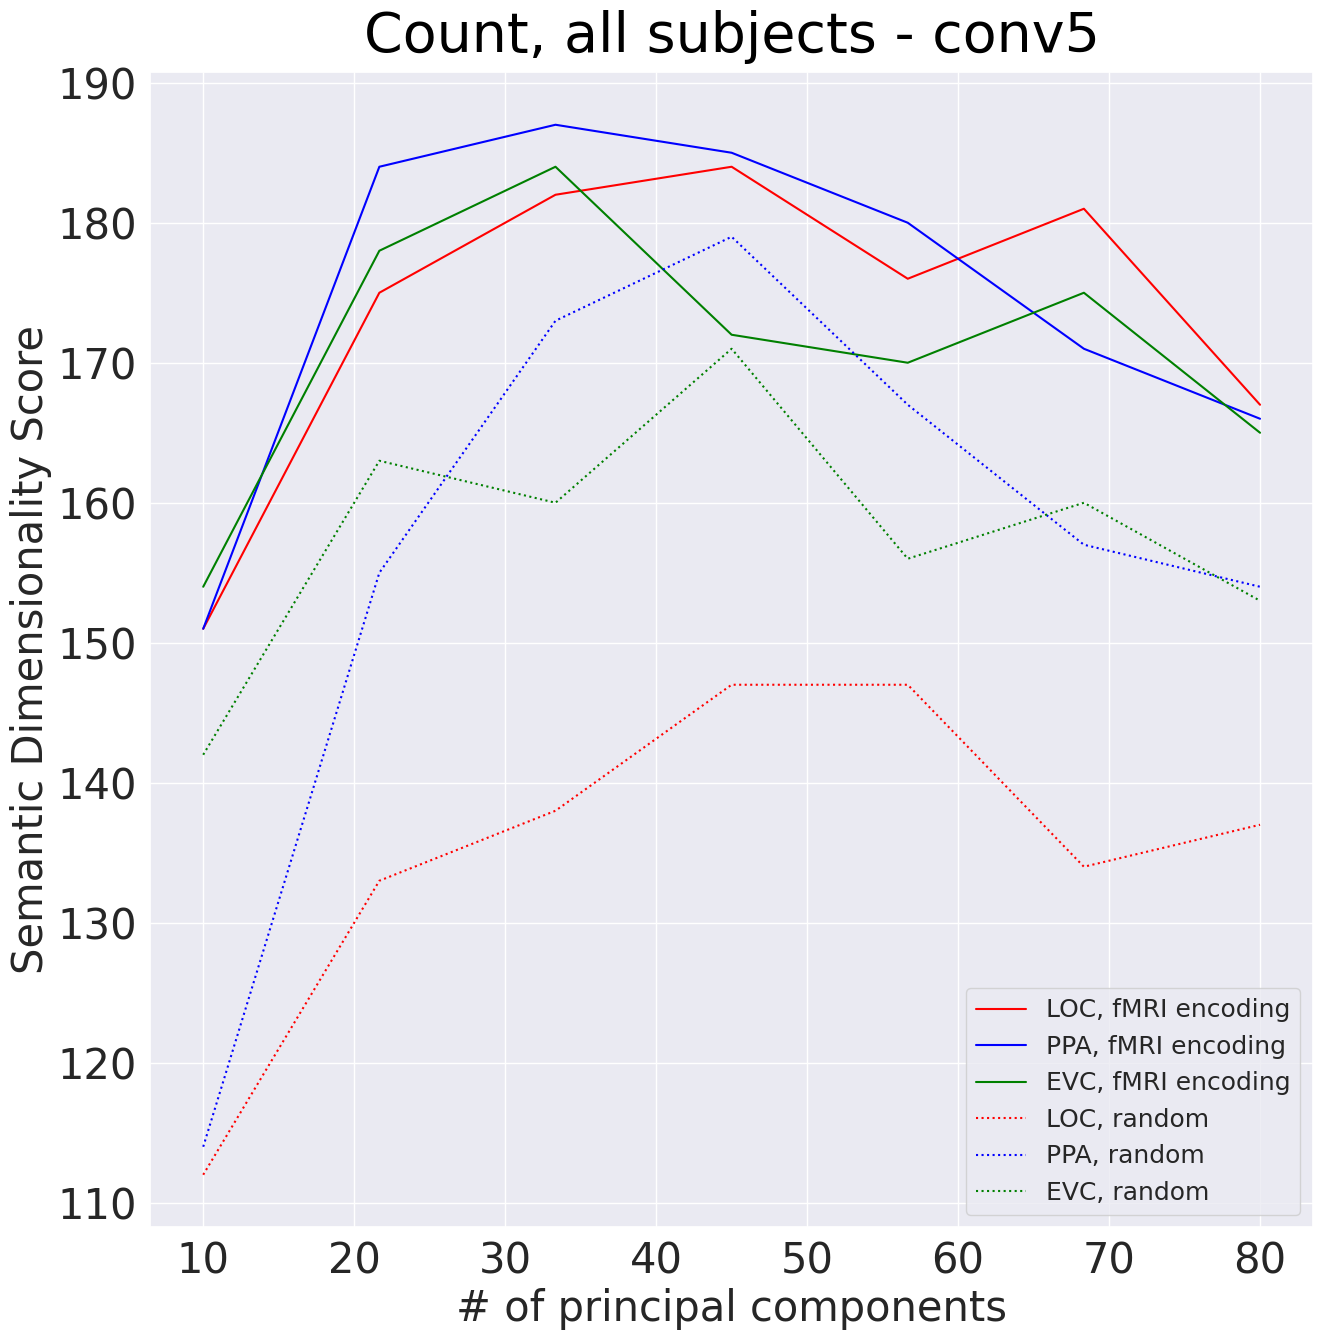

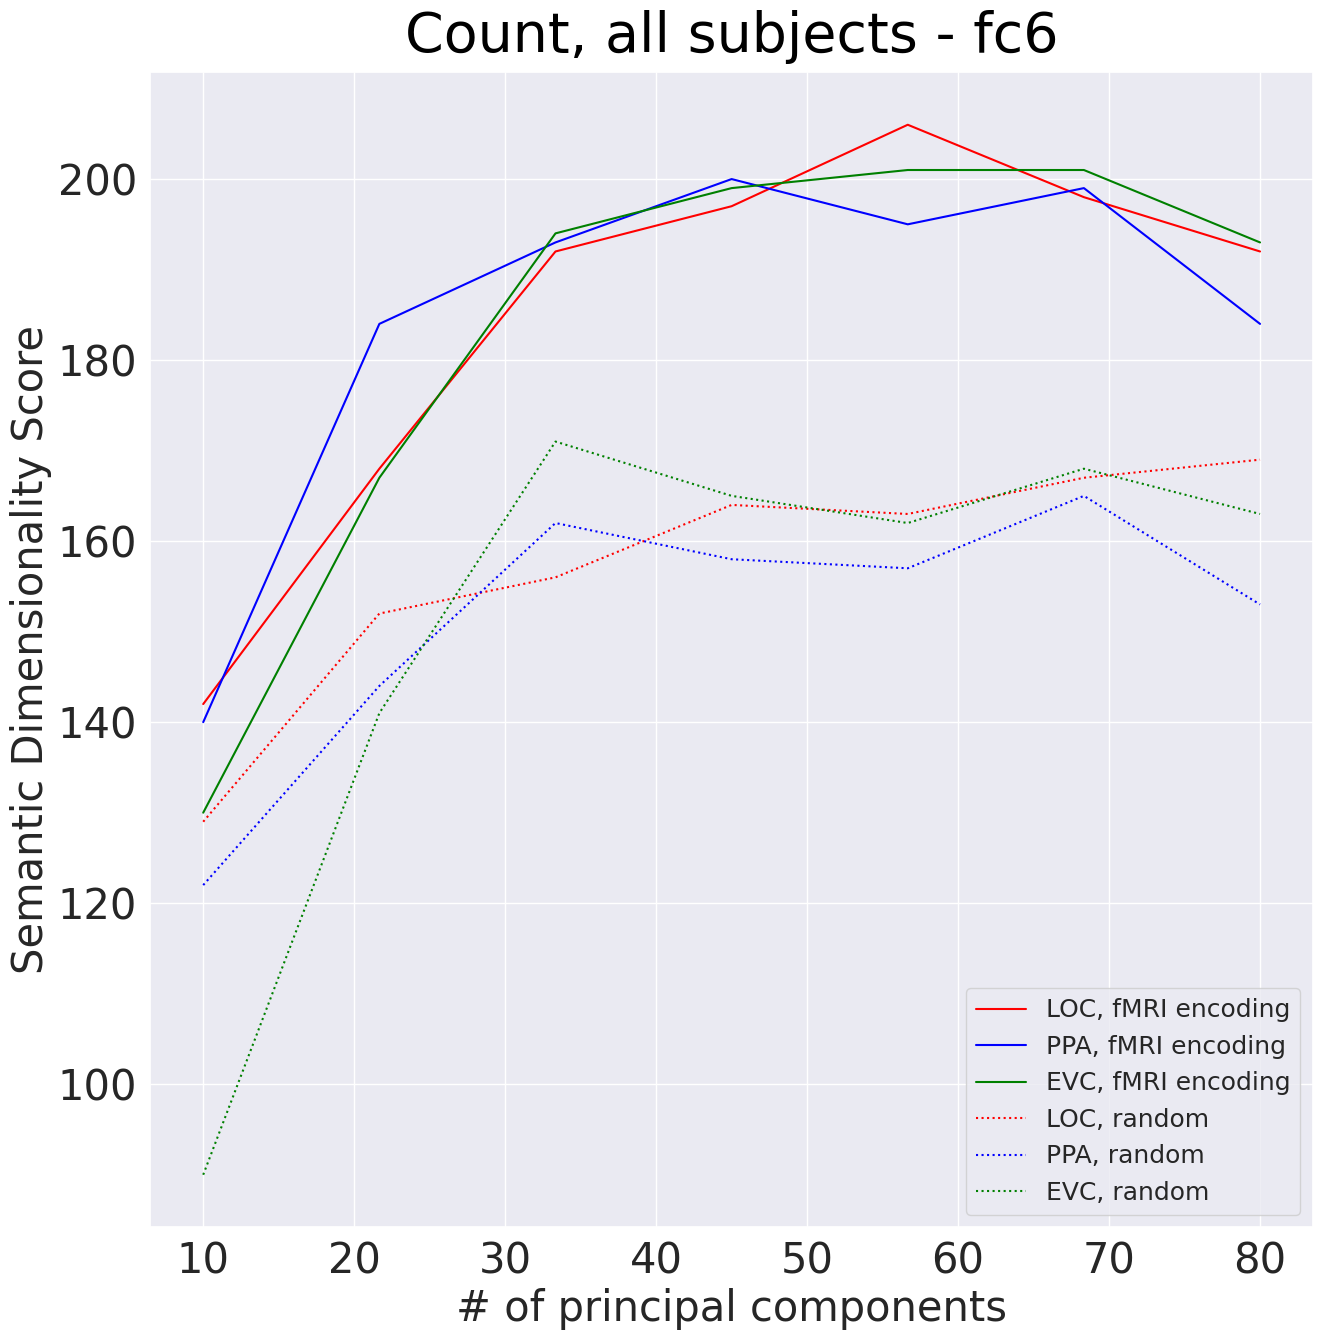

In [27]:
layeridx = {
    #"conv1": 0,
    #"conv5": 1,
    "conv5": 0,
    "fc6": 1,
    #"fc6": 1
}

for layer in layeridx:
    idx = layeridx[layer]
    x = np.linspace(10, 80, nPC)
    plt.figure(figsize=(15,15))

    title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'30'}
    sns.set()

    ax = plt.subplot() 
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(30)
    plt.xlabel('# of principal components', **axis_font)
    plt.ylabel('Semantic Dimensionality Score', **axis_font)
    plt.title("Count, all subjects - " + layer, **title_font)

    plt.plot(x, roi_dim_set['LOC'][nPC*(idx):nPC*(idx+1)], '-', color='red', label='LOC, fMRI encoding')
    plt.plot(x, roi_dim_set['PPA'][nPC*(idx):nPC*(idx+1)], '-', color='blue', label='PPA, fMRI encoding')
    plt.plot(x, roi_dim_set['EVC'][nPC*(idx):nPC*(idx+1)], '-', color='green', label='EVC, fMRI encoding')
    #plt.plot(x, roi_dim_set['PFS'][nPC*idx:nPC*(idx+1)], '-', color='maroon', label='PFS, fMRI encoding')
    #plt.plot(x, roi_dim_set['LOCPFS'][nPC*idx:nPC*(idx+1)], '-', color='grey', label='LOC+PFS, fMRI encoding')

    plt.plot(x, random_dim_set['LOC'][nPC*idx:nPC*(idx+1)], ':', color='red', label='LOC, random')
    plt.plot(x, random_dim_set['PPA'][nPC*idx:nPC*(idx+1)], ':', color='blue', label='PPA, random')
    plt.plot(x, random_dim_set['EVC'][nPC*idx:nPC*(idx+1)], ':', color='green', label='EVC, random')
    #plt.plot(x, random_dim_set['PFS'][nPC*idx:nPC*(idx+1)], ':', color='maroon', label='PFS, random ')
    #plt.plot(x, random_dim_set['LOCPFS'][nPC*idx:nPC*(idx+1)], ':', color='grey', label='LOC+PFS, random')

    #plt.plot(x, roi_dim_set['FFA'][nPC*(idx):nPC*(idx+1)], '-', color='orange', label='FFA, fMRI encoding')
    #plt.plot(x, roi_dim_set['FFAOFASTS'][nPC*(idx):nPC*(idx+1)], '-', color='purple', label='FFAOFASTS, fMRI encoding')

    #plt.plot(x, random_dim_set['FFA'][nPC*idx:nPC*(idx+1)], ':', color='orange', label='FFA, random')
    #plt.plot(x, random_dim_set['FFAOFASTS'][nPC*idx:nPC*(idx+1)], ':', color='purple', label='FFAOFASTS, random')
    
#     plt.plot(x, perm_dim_set[0]['LOC'][nPC*idx:nPC*(idx+1)], '-.', color='red', label='LOC, permuted')
#     plt.plot(x, perm_dim_set[0]['PPA'][nPC*idx:nPC*(idx+1)], '-.', color='blue', label='PPA, permuted')
#     plt.plot(x, perm_dim_set[0]['EVC'][nPC*idx:nPC*(idx+1)], '-.', color='green', label='EVC, permuted')

#     for i in range(1, 50):
#         plt.plot(x, perm_dim_set[i]['LOC'][nPC*idx:nPC*(idx+1)], '-.', color='red', label='_nolegend_')
#         plt.plot(x, perm_dim_set[i]['PPA'][nPC*idx:nPC*(idx+1)], '-.', color='blue', label='_nolegend_')
#         plt.plot(x, perm_dim_set[i]['EVC'][nPC*idx:nPC*(idx+1)], '-.', color='green', label='_nolegend_')
  
    
    plt.legend(prop={'size': 18});

    #plt.savefig('figures0923/SemanticDimensionality_face_' + layer + '.png')
    sns.reset_defaults()

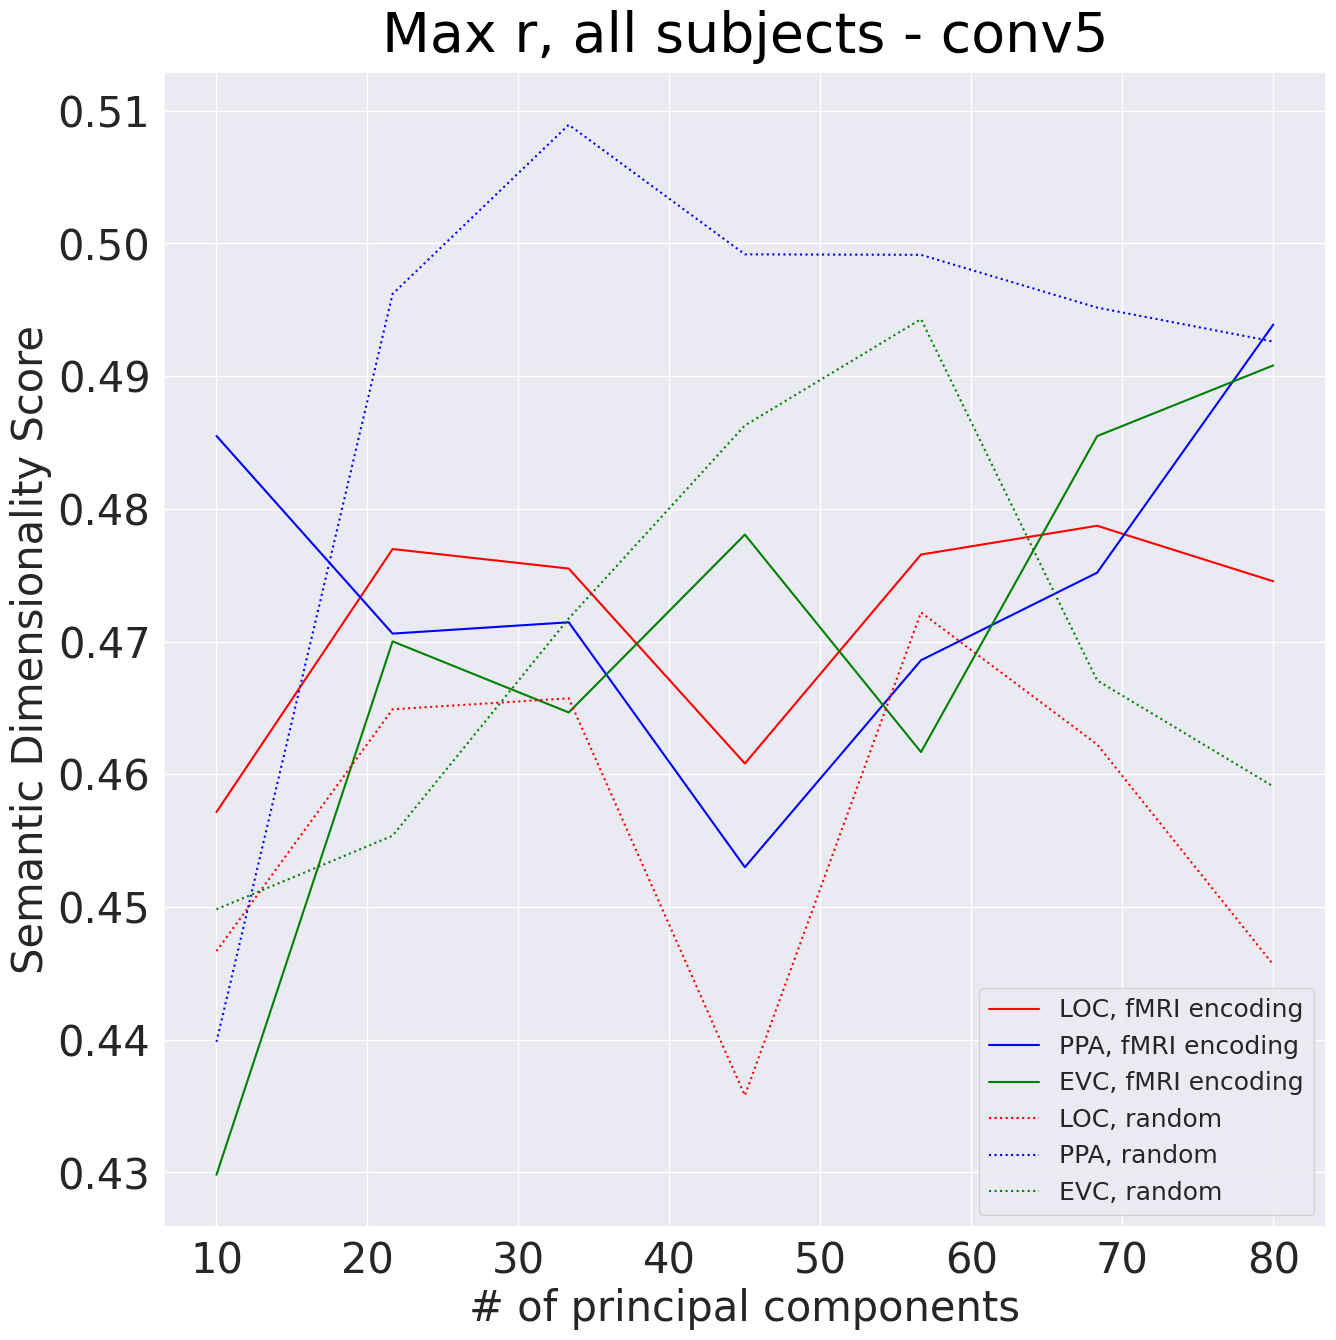

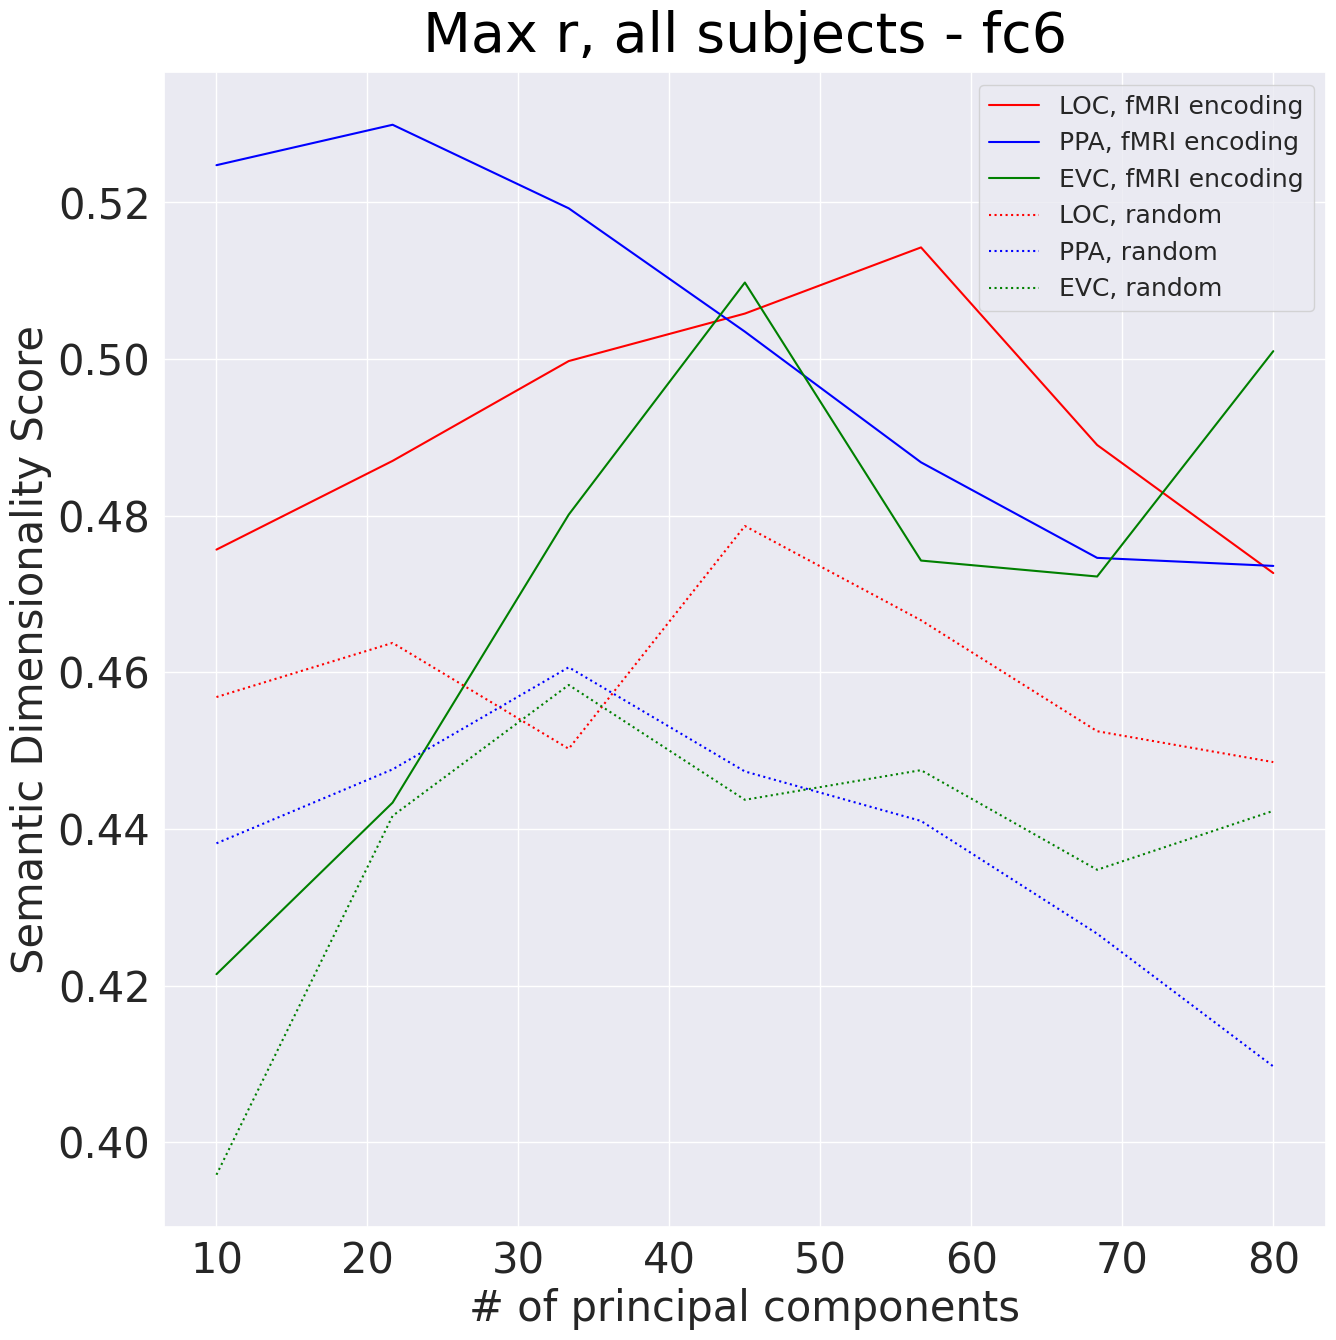

In [34]:
layeridx = {
    #"conv1": 0,
    #"conv5": 1,
    "conv5": 0,
    "fc6": 1,
    #"fc6": 1
}

for layer in layeridx:
    idx = layeridx[layer]
    x = np.linspace(10, 80, nPC)
    plt.figure(figsize=(15,15))

    title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'30'}
    sns.set()

    ax = plt.subplot() 
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(30)
    plt.xlabel('# of principal components', **axis_font)
    plt.ylabel('Semantic Dimensionality Score', **axis_font)
    plt.title("Max r, all subjects - " + layer, **title_font)

    plt.plot(x, roi_max_set['LOC'][nPC*(idx):nPC*(idx+1)], '-', color='red', label='LOC, fMRI encoding')
    plt.plot(x, roi_max_set['PPA'][nPC*(idx):nPC*(idx+1)], '-', color='blue', label='PPA, fMRI encoding')
    plt.plot(x, roi_max_set['EVC'][nPC*(idx):nPC*(idx+1)], '-', color='green', label='EVC, fMRI encoding')
    #plt.plot(x, roi_dim_set['PFS'][nPC*idx:nPC*(idx+1)], '-', color='maroon', label='PFS, fMRI encoding')
    #plt.plot(x, roi_dim_set['LOCPFS'][nPC*idx:nPC*(idx+1)], '-', color='grey', label='LOC+PFS, fMRI encoding')

    plt.plot(x, random_max_set['LOC'][nPC*idx:nPC*(idx+1)], ':', color='red', label='LOC, random')
    plt.plot(x, random_max_set['PPA'][nPC*idx:nPC*(idx+1)], ':', color='blue', label='PPA, random')
    plt.plot(x, random_max_set['EVC'][nPC*idx:nPC*(idx+1)], ':', color='green', label='EVC, random')
    #plt.plot(x, random_dim_set['PFS'][nPC*idx:nPC*(idx+1)], ':', color='maroon', label='PFS, random ')
    #plt.plot(x, random_dim_set['LOCPFS'][nPC*idx:nPC*(idx+1)], ':', color='grey', label='LOC+PFS, random')

    #plt.plot(x, roi_dim_set['FFA'][nPC*(idx):nPC*(idx+1)], '-', color='orange', label='FFA, fMRI encoding')
    #plt.plot(x, roi_dim_set['FFAOFASTS'][nPC*(idx):nPC*(idx+1)], '-', color='purple', label='FFAOFASTS, fMRI encoding')

    #plt.plot(x, random_dim_set['FFA'][nPC*idx:nPC*(idx+1)], ':', color='orange', label='FFA, random')
    #plt.plot(x, random_dim_set['FFAOFASTS'][nPC*idx:nPC*(idx+1)], ':', color='purple', label='FFAOFASTS, random')
    
#     plt.plot(x, perm_max_set[0]['LOC'][nPC*idx:nPC*(idx+1)], '-.', color='red', label='LOC, permuted')
#     plt.plot(x, perm_max_set[0]['PPA'][nPC*idx:nPC*(idx+1)], '-.', color='blue', label='PPA, permuted')
#     plt.plot(x, perm_max_set[0]['EVC'][nPC*idx:nPC*(idx+1)], '-.', color='green', label='EVC, permuted')

#     for i in range(1, 10):
#         plt.plot(x, perm_dim_set[i]['LOC'][nPC*idx:nPC*(idx+1)], '-.', color='red', label='_nolegend_')
#         plt.plot(x, perm_dim_set[i]['PPA'][nPC*idx:nPC*(idx+1)], '-.', color='blue', label='_nolegend_')
#         plt.plot(x, perm_dim_set[i]['EVC'][nPC*idx:nPC*(idx+1)], '-.', color='green', label='_nolegend_')
  
    
    plt.legend(prop={'size': 18});

    #plt.savefig('figures0923/SemanticDimensionality_face_' + layer + '.png')
    sns.reset_defaults()

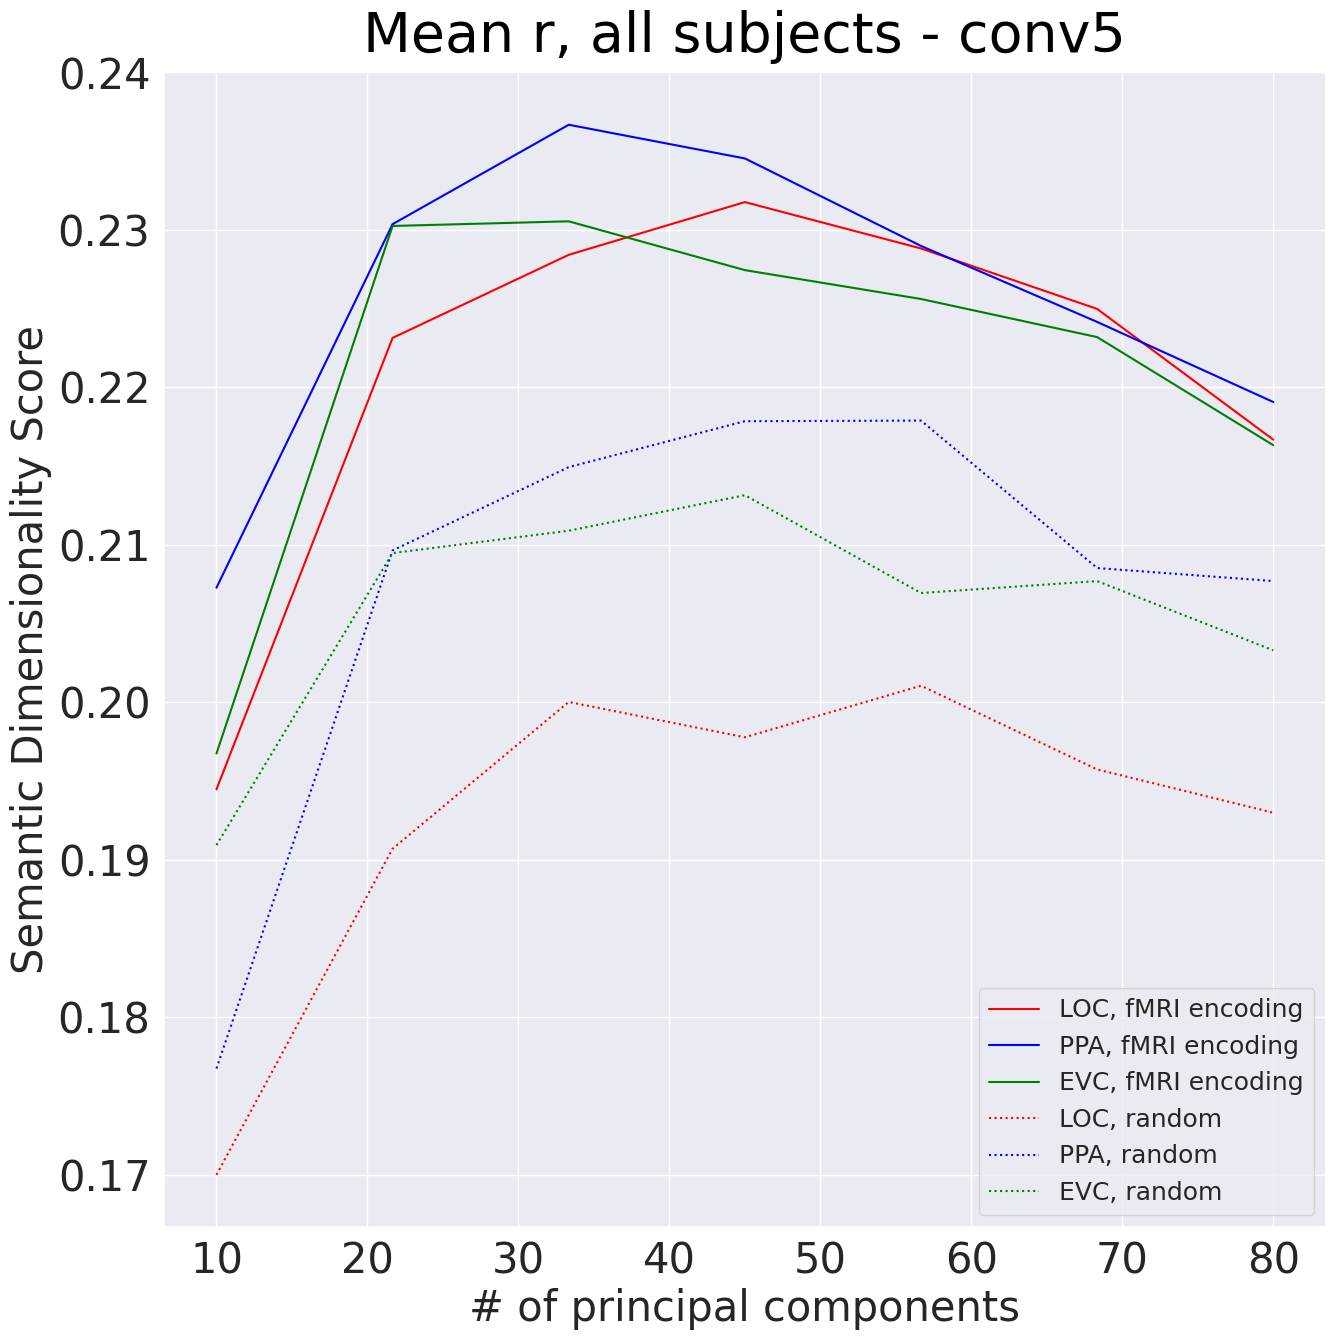

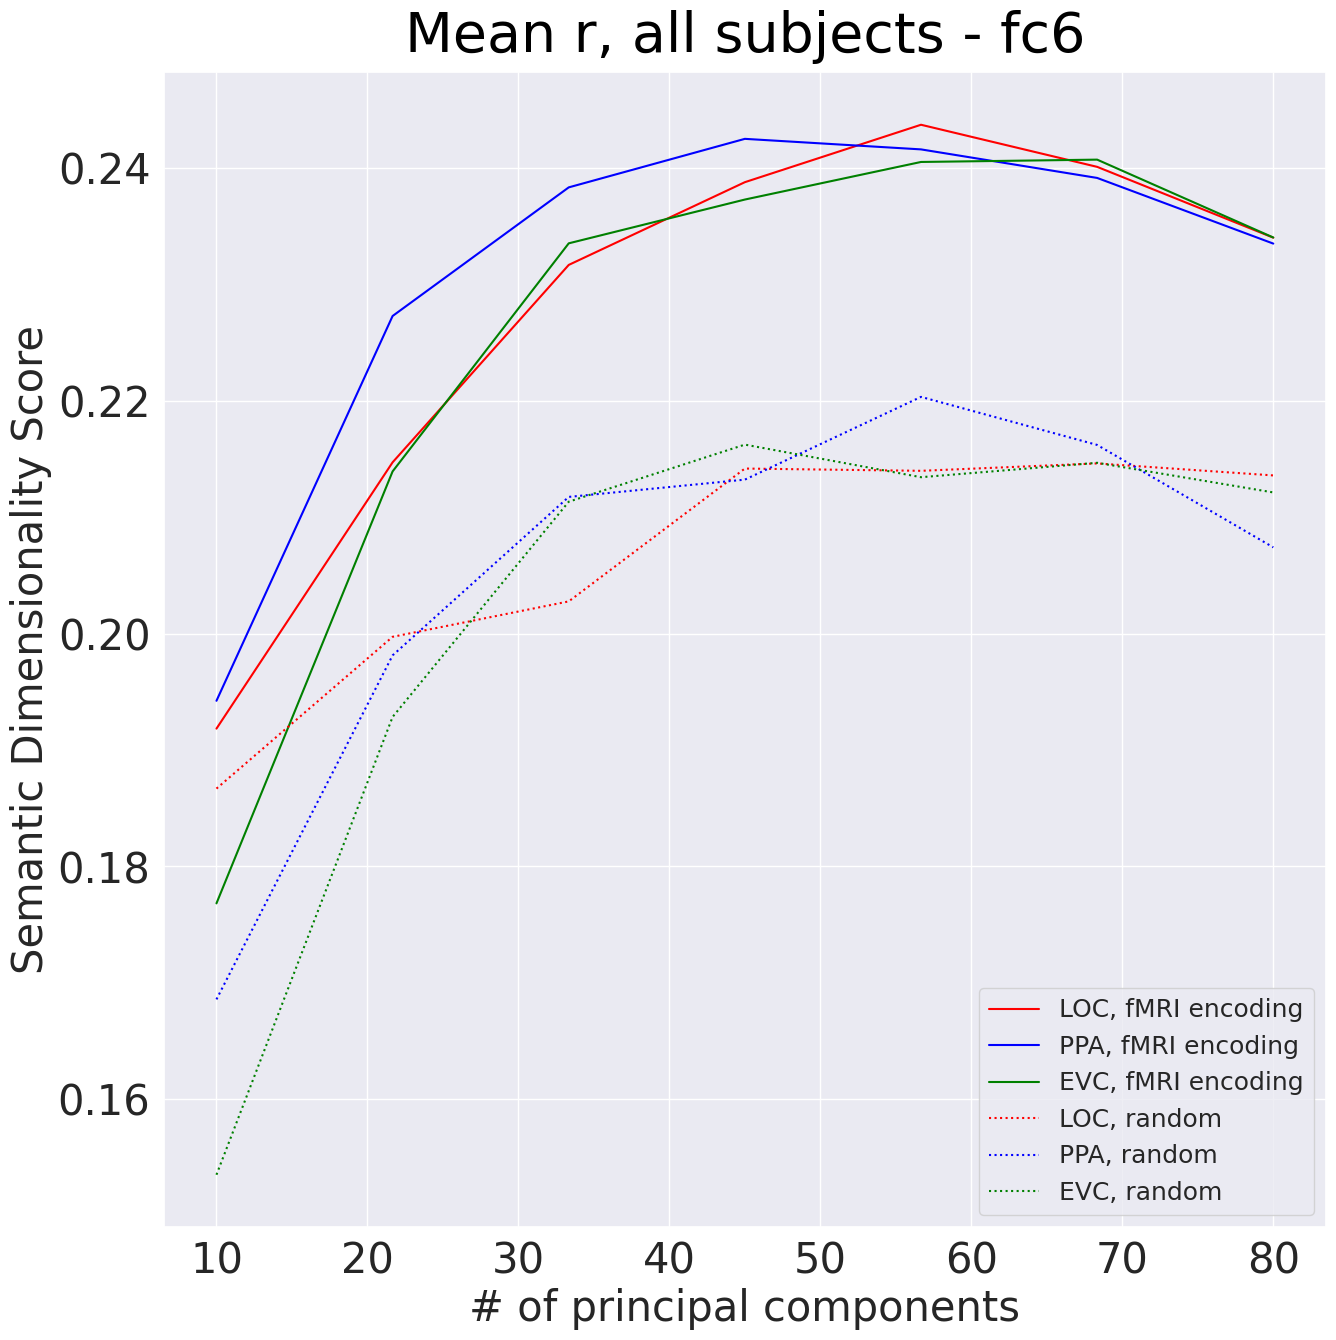

In [35]:
layeridx = {
    #"conv1": 0,
    #"conv5": 1,
    "conv5": 0,
    "fc6": 1,
    #"fc6": 1
}

for layer in layeridx:
    idx = layeridx[layer]
    x = np.linspace(10, 80, nPC)
    plt.figure(figsize=(15,15))

    title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'30'}
    sns.set()

    ax = plt.subplot() 
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(30)
    plt.xlabel('# of principal components', **axis_font)
    plt.ylabel('Semantic Dimensionality Score', **axis_font)
    plt.title("Mean r, all subjects - " + layer, **title_font)

    plt.plot(x, roi_mean_set['LOC'][nPC*(idx):nPC*(idx+1)], '-', color='red', label='LOC, fMRI encoding')
    plt.plot(x, roi_mean_set['PPA'][nPC*(idx):nPC*(idx+1)], '-', color='blue', label='PPA, fMRI encoding')
    plt.plot(x, roi_mean_set['EVC'][nPC*(idx):nPC*(idx+1)], '-', color='green', label='EVC, fMRI encoding')
    #plt.plot(x, roi_dim_set['PFS'][nPC*idx:nPC*(idx+1)], '-', color='maroon', label='PFS, fMRI encoding')
    #plt.plot(x, roi_dim_set['LOCPFS'][nPC*idx:nPC*(idx+1)], '-', color='grey', label='LOC+PFS, fMRI encoding')

    plt.plot(x, random_mean_set['LOC'][nPC*idx:nPC*(idx+1)], ':', color='red', label='LOC, random')
    plt.plot(x, random_mean_set['PPA'][nPC*idx:nPC*(idx+1)], ':', color='blue', label='PPA, random')
    plt.plot(x, random_mean_set['EVC'][nPC*idx:nPC*(idx+1)], ':', color='green', label='EVC, random')
    #plt.plot(x, random_dim_set['PFS'][nPC*idx:nPC*(idx+1)], ':', color='maroon', label='PFS, random ')
    #plt.plot(x, random_dim_set['LOCPFS'][nPC*idx:nPC*(idx+1)], ':', color='grey', label='LOC+PFS, random')

    #plt.plot(x, roi_dim_set['FFA'][nPC*(idx):nPC*(idx+1)], '-', color='orange', label='FFA, fMRI encoding')
    #plt.plot(x, roi_dim_set['FFAOFASTS'][nPC*(idx):nPC*(idx+1)], '-', color='purple', label='FFAOFASTS, fMRI encoding')

    #plt.plot(x, random_dim_set['FFA'][nPC*idx:nPC*(idx+1)], ':', color='orange', label='FFA, random')
    #plt.plot(x, random_dim_set['FFAOFASTS'][nPC*idx:nPC*(idx+1)], ':', color='purple', label='FFAOFASTS, random')
    
#     plt.plot(x, perm_mean_set[0]['LOC'][nPC*idx:nPC*(idx+1)], '-.', color='red', label='LOC, permuted')
#     plt.plot(x, perm_mean_set[0]['PPA'][nPC*idx:nPC*(idx+1)], '-.', color='blue', label='PPA, permuted')
#     plt.plot(x, perm_mean_set[0]['EVC'][nPC*idx:nPC*(idx+1)], '-.', color='green', label='EVC, permuted')

#     for i in range(1, 10):
#         plt.plot(x, perm_mean_set[i]['LOC'][nPC*idx:nPC*(idx+1)], '-.', color='red', label='_nolegend_')
#         plt.plot(x, perm_mean_set[i]['PPA'][nPC*idx:nPC*(idx+1)], '-.', color='blue', label='_nolegend_')
#         plt.plot(x, perm_mean_set[i]['EVC'][nPC*idx:nPC*(idx+1)], '-.', color='green', label='_nolegend_')
  
    
    plt.legend(prop={'size': 18});

    #plt.savefig('figures0923/SemanticDimensionality_face_' + layer + '.png')
    sns.reset_defaults()

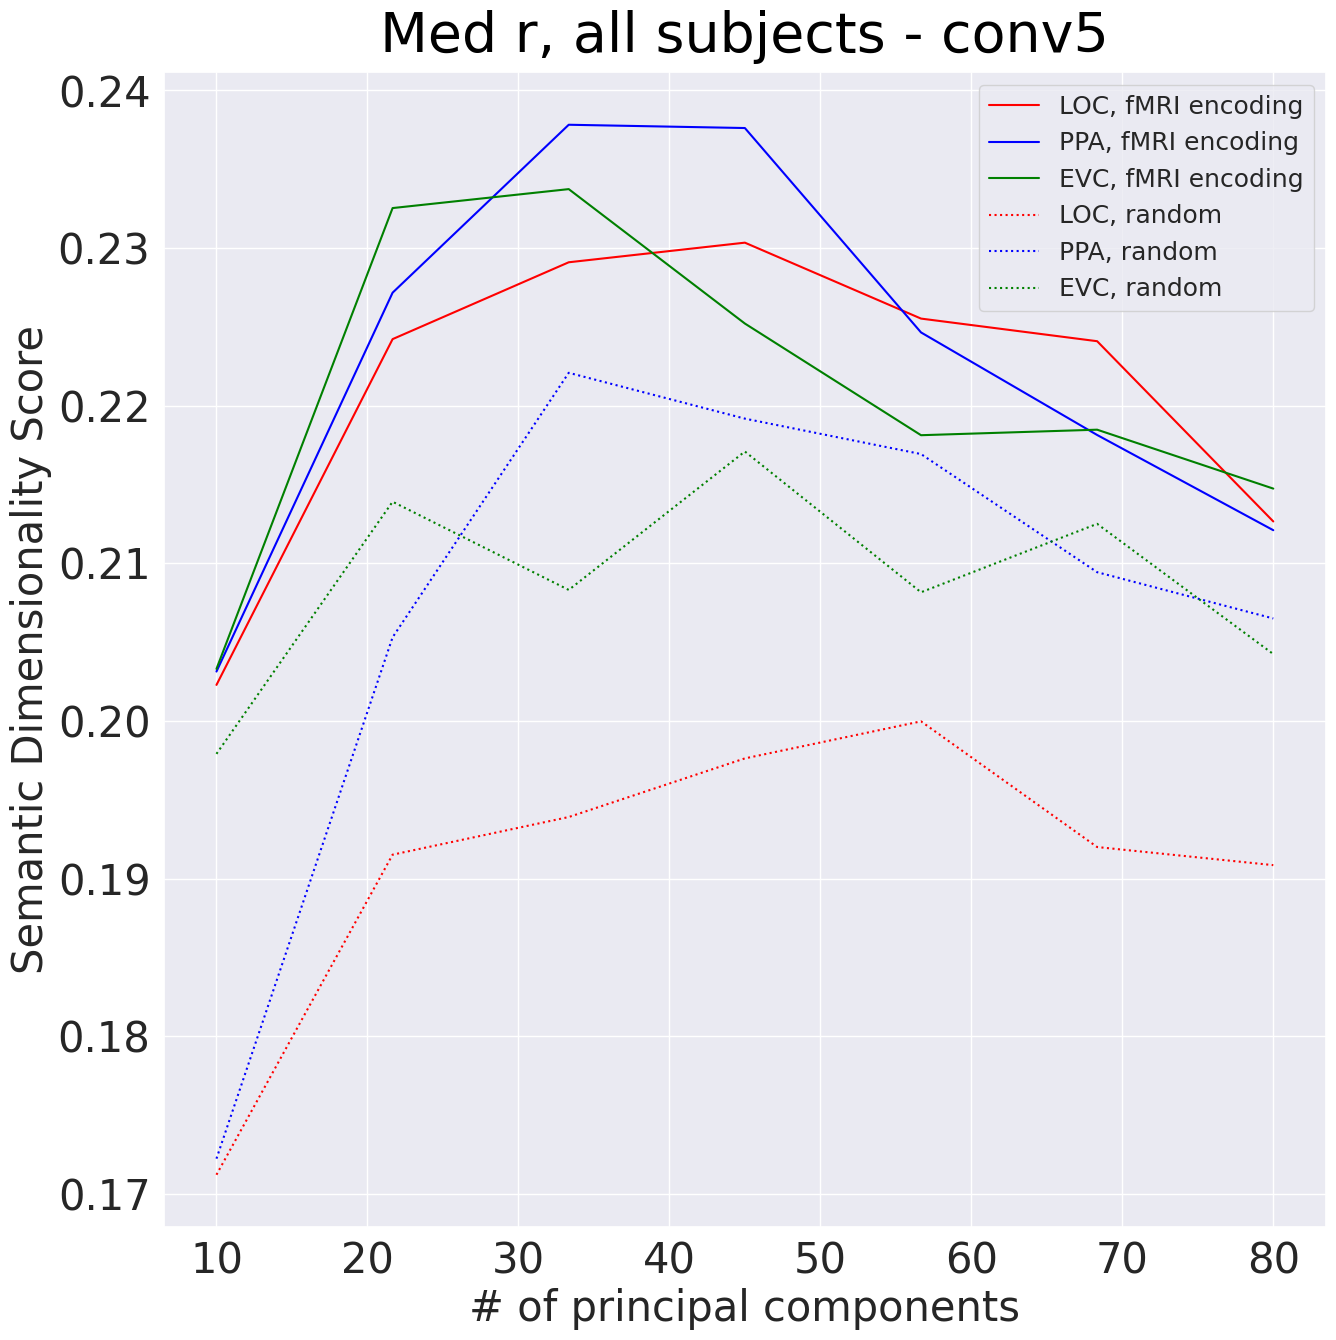

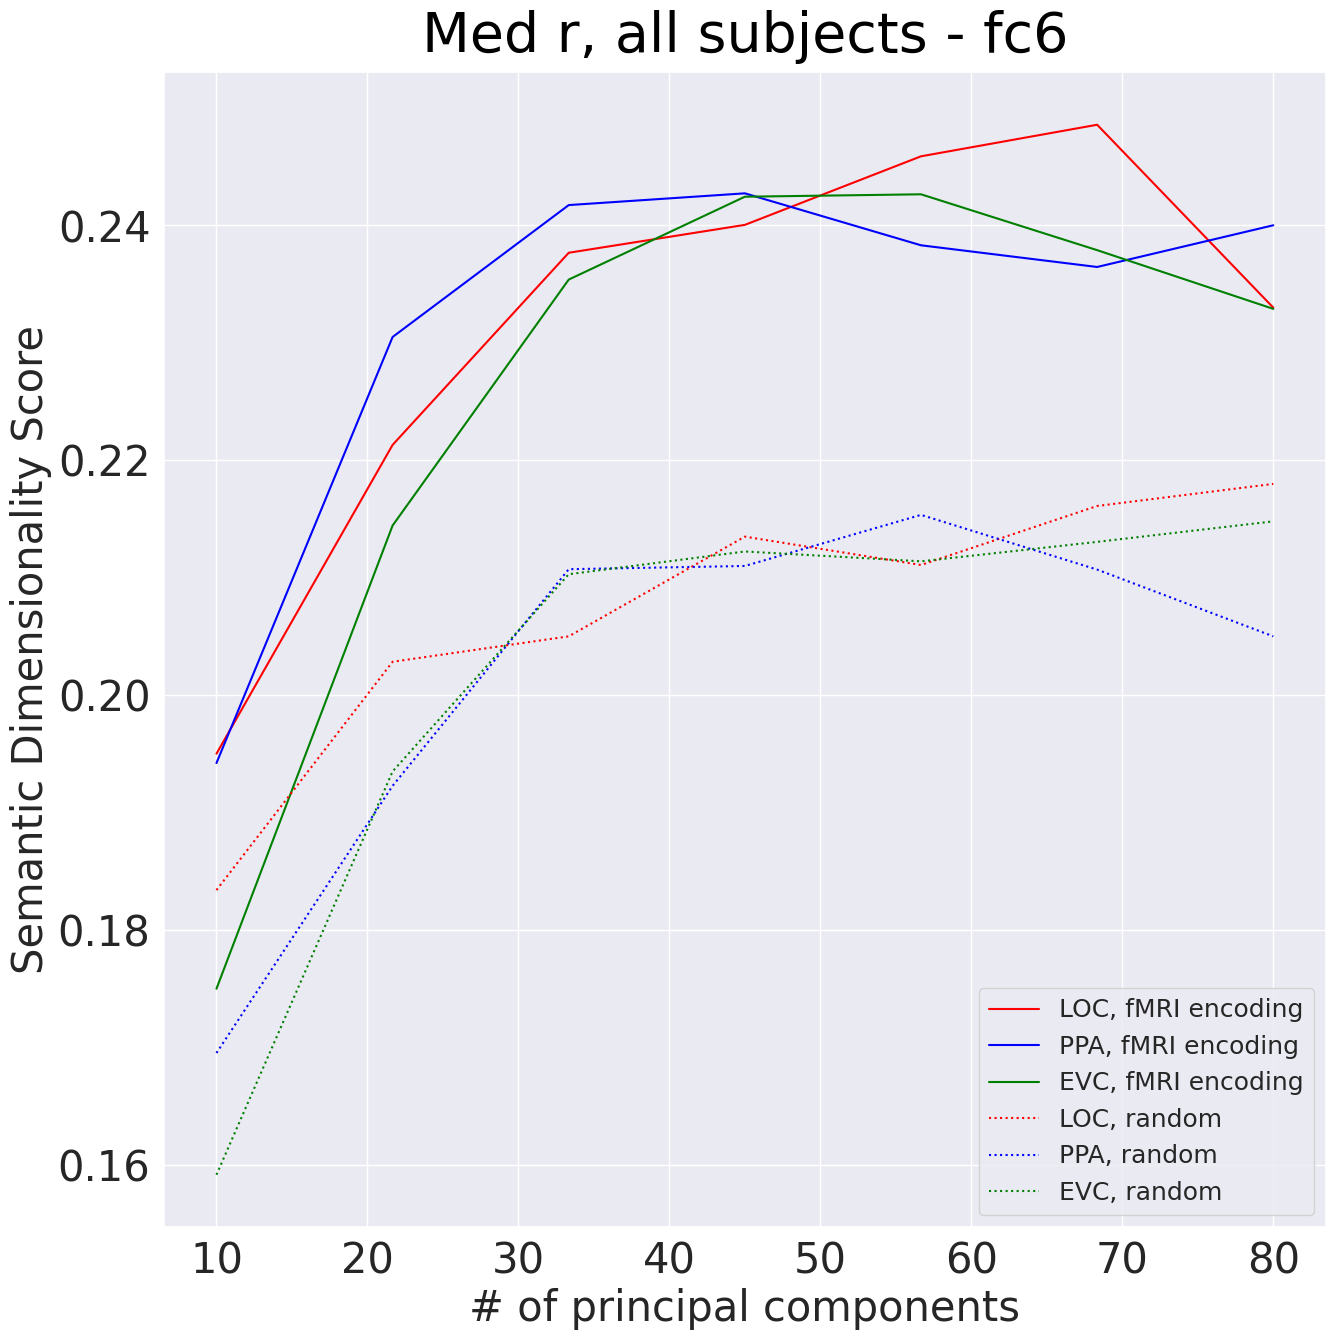

In [37]:
layeridx = {
    #"conv1": 0,
    #"conv5": 1,
    "conv5": 0,
    "fc6": 1,
    #"fc6": 1
}

for layer in layeridx:
    idx = layeridx[layer]
    x = np.linspace(10, 80, nPC)
    plt.figure(figsize=(15,15))

    title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'30'}
    sns.set()

    ax = plt.subplot() 
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(30)
    plt.xlabel('# of principal components', **axis_font)
    plt.ylabel('Semantic Dimensionality Score', **axis_font)
    plt.title("Med r, all subjects - " + layer, **title_font)

    plt.plot(x, roi_med_set['LOC'][nPC*(idx):nPC*(idx+1)], '-', color='red', label='LOC, fMRI encoding')
    plt.plot(x, roi_med_set['PPA'][nPC*(idx):nPC*(idx+1)], '-', color='blue', label='PPA, fMRI encoding')
    plt.plot(x, roi_med_set['EVC'][nPC*(idx):nPC*(idx+1)], '-', color='green', label='EVC, fMRI encoding')
    #plt.plot(x, roi_dim_set['PFS'][nPC*idx:nPC*(idx+1)], '-', color='maroon', label='PFS, fMRI encoding')
    #plt.plot(x, roi_dim_set['LOCPFS'][nPC*idx:nPC*(idx+1)], '-', color='grey', label='LOC+PFS, fMRI encoding')

    plt.plot(x, random_med_set['LOC'][nPC*idx:nPC*(idx+1)], ':', color='red', label='LOC, random')
    plt.plot(x, random_med_set['PPA'][nPC*idx:nPC*(idx+1)], ':', color='blue', label='PPA, random')
    plt.plot(x, random_med_set['EVC'][nPC*idx:nPC*(idx+1)], ':', color='green', label='EVC, random')
    #plt.plot(x, random_dim_set['PFS'][nPC*idx:nPC*(idx+1)], ':', color='maroon', label='PFS, random ')
    #plt.plot(x, random_dim_set['LOCPFS'][nPC*idx:nPC*(idx+1)], ':', color='grey', label='LOC+PFS, random')

    #plt.plot(x, roi_dim_set['FFA'][nPC*(idx):nPC*(idx+1)], '-', color='orange', label='FFA, fMRI encoding')
    #plt.plot(x, roi_dim_set['FFAOFASTS'][nPC*(idx):nPC*(idx+1)], '-', color='purple', label='FFAOFASTS, fMRI encoding')

    #plt.plot(x, random_dim_set['FFA'][nPC*idx:nPC*(idx+1)], ':', color='orange', label='FFA, random')
    #plt.plot(x, random_dim_set['FFAOFASTS'][nPC*idx:nPC*(idx+1)], ':', color='purple', label='FFAOFASTS, random')
    
#     plt.plot(x, perm_med_set[0]['LOC'][nPC*idx:nPC*(idx+1)], '-.', color='red', label='LOC, permuted')
#     plt.plot(x, perm_med_set[0]['PPA'][nPC*idx:nPC*(idx+1)], '-.', color='blue', label='PPA, permuted')
#     plt.plot(x, perm_med_set[0]['EVC'][nPC*idx:nPC*(idx+1)], '-.', color='green', label='EVC, permuted')

#     for i in range(1, 10):
#         plt.plot(x, perm_med_set[i]['LOC'][nPC*idx:nPC*(idx+1)], '-.', color='red', label='_nolegend_')
#         plt.plot(x, perm_med_set[i]['PPA'][nPC*idx:nPC*(idx+1)], '-.', color='blue', label='_nolegend_')
#         plt.plot(x, perm_med_set[i]['EVC'][nPC*idx:nPC*(idx+1)], '-.', color='green', label='_nolegend_')
  
    
    plt.legend(prop={'size': 18});

    #plt.savefig('figures0923/SemanticDimensionality_face_' + layer + '.png')
    sns.reset_defaults()

In [ ]:
#print(roi_r_set['LOC'])
#print(roi_r_set['PPA'])
#print(roi_r_set['EVC'])
print(len(cnn_r_set))

np.save('02_dnn_r_pca', cnn_r_set)
#np.save('cnn_random_set_pca', cnn_random_r_set)

#roi_r_set = np.load('roi_r_set_pca')
#cnn_r_set = np.load('cnn_r_set_pca')
#np.save('roi_r_subj1_all_pca', roi_r_set)
#np.save('cnn_pretrained_r_pca', cnn_r_set)


In [ ]:

for i in range(9):
    plt.figure(figsize=(50,35))
    title_font = {'fontname':'Arial', 'size':'100', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'100'}
    sns.set()

    ax = plt.subplot() 
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(100)
    plt.xlabel('Sense', **axis_font)
    plt.ylabel('PredictionAccuracy', **axis_font)
    plt.title("Prediction Accuracy ", **title_font)

    #plt.bar(range(0,nDim), np.sort(roi_r_set[roi][0])[::-1], color='b', label=roi + '_conv1', alpha=0.5)
    plt.bar(range(0,nDim), np.sort(cnn_r_set[i])[::-1], color='g', label='0', alpha=0.5)
    plt.bar(range(0,nDim), np.sort(cnn_r_set[i+9])[::-1], color='r', label='9', alpha=0.5)
    plt.bar(range(0,nDim), np.sort(cnn_r_set[i+9*2])[::-1], color='c', label='8', alpha=0.5)

    #plt.bar(range(0,nDim), np.sort(cnn_mean_r)[::-1], color='darkblue', label='CNN features', alpha=0.2)
    plt.legend(prop={'size': 100})
    plt.ylim(-0.2, 0.6) 

    #plt.savefig('figures/Subj1_noPCA_' + roi + '.png')

    sns.reset_defaults()

In [ ]:
roi = 'LOC'

for pc in range(10, 100, 10):
    plt.figure(figsize=(50,35))
    title_font = {'fontname':'Arial', 'size':'100', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'100'}
    sns.set()

    ax = plt.subplot() 
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(100)
    plt.xlabel('Sense', **axis_font)
    plt.ylabel('PredictionAccuracy', **axis_font)
    plt.title("Prediction Accuracy ", **title_font)

    i = int(pc/10) - 1
    plt.bar(range(0,nDim), np.sort(roi_r_set[roi][i])[::-1], color='darkred', label='fMRI (LOC)', alpha=0.2)
    #plt.bar(range(0,nDim), np.sort(cnn_r_set[i])[::-1], color='darkblue', label='CNN features', alpha=0.2)

    plt.legend(prop={'size': 100})
    plt.ylim(-0.2, 0.6) 
    
    #save figure
    #plt.savefig('figures/SensePrediction_LOC_conv5_reproduced' + str(pc) + '.png')
    
    sns.reset_defaults()

In [ ]:
#roi_r_set = np.load('02_roi_r_subj1_pca.npy', allow_pickle=True)
dnn_r_set = np.load('02_dnn_r_pca.npy', allow_pickle=True)
#roi_r_set = np.ndarray.tolist(roi_r_set)


#roi_dim_set = {}
cnn_dim_set = []

# for roi in rois:
#     roi_dim = []
#     for dim_pred in roi_r_set[roi]:
#         dim_pred = np.array(dim_pred)
#         dim_pred_score = np.sum(dim_pred > r_threshold)
#         roi_dim.append(dim_pred_score)
#     roi_dim_set[roi] = roi_dim
    
for dim_pred in cnn_r_set:
    dim_pred = np.array(dim_pred)
    dim_pred_score = np.sum(dim_pred > r_threshold)
    cnn_dim_set.append(dim_pred_score)


In [ ]:
# CONV1

x = np.linspace(10, 100, 9)
plt.figure(figsize=(15,15))

title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}
sns.set()

ax = plt.subplot() 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)
plt.xlabel('# of principal components', **axis_font)
plt.ylabel('Semantic Dimensionality Score', **axis_font)
plt.title("PC-Matched Semantic Dimensionality (Subj1, Conv1)", **title_font)

plt.plot(x, roi_dim_set['LOC'][0:9], '-', color='darkorange', label='LOC - Conv1')
#plt.plot(x, roi_dim_set['LOC'][9*2:9*3], '--', color='orange', label='LOC - Fc6')
plt.plot(x, roi_dim_set['LOC'][9*3:9*4], '--', color='tan', label='LOC - Conv1 random')
#plt.plot(x, roi_dim_set['LOC'][9*5:9*6], '--', color='moccasin', label='LOC - Fc6 random')

plt.plot(x, roi_dim_set['PPA'][0:9], '-', color='forestgreen', label='PPA - Conv1')
#plt.plot(x, roi_dim_set['PPA'][9*2:9*3], '--', color='limegreen', label='PPA - Fc6')
plt.plot(x, roi_dim_set['PPA'][9*3:9*4], '--', color='seagreen', label='PPA - Conv1 random')
#plt.plot(x, roi_dim_set['PPA'][9*5:9*6], '--', color='mediumseagreen', label='PPA - Fc6 random')

plt.plot(x, roi_dim_set['EVC'][0:9], '-', color='blue', label='EVC - Conv1')
#plt.plot(x, roi_dim_set['EVC'][9*2:9*3], '--', color='darkblue', label='EVC - Fc6')
plt.plot(x, roi_dim_set['EVC'][9*3:9*4], '--', color='darkslateblue', label='EVC - Conv1 random')
#plt.plot(x, roi_dim_set['EVC'][9*5:9*6], '--', color='slateblue', label='EVC - Fc6 random')

plt.plot(x, cnn_dim_set[0:9], '-r', label='CNN - Conv1')
#plt.plot(x, cnn_dim_set[9:9*2], '--', color='fuchsia', label='CNN - Fc6')
plt.plot(x, cnn_dim_set[9*3:9*4], ':', color='firebrick', label='CNN - Conv1 random')
#plt.plot(x, cnn_dim_set[9*3:9*4], '--', color='pink', label='CNN - Fc6 random')

plt.legend(prop={'size': 18});

plt.savefig('figures/SemanticDimensionality_Conv1' + '.png')
sns.reset_defaults()


In [ ]:
# CONV5

x = np.linspace(10, 100, 9)
plt.figure(figsize=(15,15))

title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}
sns.set()

ax = plt.subplot() 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)
plt.xlabel('# of principal components', **axis_font)
plt.ylabel('Semantic Dimensionality Score', **axis_font)
plt.title("PC-Matched Semantic Dimensionality (Subj1, Conv5)", **title_font)

plt.plot(x, roi_dim_set['LOC'][9:9*2], '-', color='darkorange', label='LOC - Conv5')
#plt.plot(x, roi_dim_set['LOC'][9*2:9*3], '--', color='orange', label='LOC - Fc6')
plt.plot(x, roi_dim_set['LOC'][9*4:9*5], '--', color='tan', label='LOC - Conv5 random')
#plt.plot(x, roi_dim_set['LOC'][9*5:9*6], '--', color='moccasin', label='LOC - Fc6 random')

plt.plot(x, roi_dim_set['PPA'][9:9*2], '-', color='forestgreen', label='PPA - Conv5')
#plt.plot(x, roi_dim_set['PPA'][9*2:9*3], '--', color='limegreen', label='PPA - Fc6')
plt.plot(x, roi_dim_set['PPA'][9*4:9*5], '--', color='seagreen', label='PPA - Conv5 random')
#plt.plot(x, roi_dim_set['PPA'][9*5:9*6], '--', color='mediumseagreen', label='PPA - Fc6 random')

plt.plot(x, roi_dim_set['EVC'][9:9*2], '-', color='blue', label='EVC - Conv5')
#plt.plot(x, roi_dim_set['EVC'][9*2:9*3], '--', color='darkblue', label='EVC - Fc6')
plt.plot(x, roi_dim_set['EVC'][9*4:9*5], '--', color='darkslateblue', label='EVC - Conv5 random')
#plt.plot(x, roi_dim_set['EVC'][9*5:9*6], '--', color='slateblue', label='EVC - Fc6 random')

plt.plot(x, cnn_dim_set[9:9*2], '-r', label='CNN - Conv5')
#plt.plot(x, cnn_dim_set[9:9*2], '--', color='fuchsia', label='CNN - Fc6')
plt.plot(x, cnn_dim_set[9*4:9*5], ':', color='firebrick', label='CNN - Conv5 random')
#plt.plot(x, cnn_dim_set[9*3:9*4], '--', color='pink', label='CNN - Fc6 random')

plt.legend(prop={'size': 18});

plt.savefig('figures/SemanticDimensionality_Conv5' + '.png')
sns.reset_defaults()


In [ ]:

# FC6

x = np.linspace(10, 100, 9)
plt.figure(figsize=(15,15))

title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}
sns.set()

ax = plt.subplot() 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)
plt.xlabel('# of principal components', **axis_font)
plt.ylabel('Semantic Dimensionality Score', **axis_font)
plt.title("PC-Matched Semantic Dimensionality (Subj1, FC6)", **title_font)


x = np.linspace(10, 100, 9)
#plt.plot(x, roi_dim_set['LOC'][9:9*2], '--', color='darkorange', label='LOC - Conv5')
plt.plot(x, roi_dim_set['LOC'][9*2:9*3], '-', color='orange', label='LOC - Fc6')
#plt.plot(x, roi_dim_set['LOC'][9*4:9*5], '--', color='tan', label='LOC - Conv5 random')
plt.plot(x, roi_dim_set['LOC'][9*5:9*6], '--', color='moccasin', label='LOC - Fc6 random')

#plt.plot(x, roi_dim_set['PPA'][9:9*2], '--', color='forestgreen', label='PPA - Conv5')
plt.plot(x, roi_dim_set['PPA'][9*2:9*3], '-', color='limegreen', label='PPA - Fc6')
#plt.plot(x, roi_dim_set['PPA'][9*4:9*5], '--', color='seagreen', label='PPA - Conv5 random')
plt.plot(x, roi_dim_set['PPA'][9*5:9*6], '--', color='mediumseagreen', label='PPA - Fc6 random')

#plt.plot(x, roi_dim_set['EVC'][9:9*2], '--', color='blue', label='EVC - Conv5')
plt.plot(x, roi_dim_set['EVC'][9*2:9*3], '-', color='darkblue', label='EVC - Fc6')
#plt.plot(x, roi_dim_set['EVC'][9*4:9*5], '--', color='darkslateblue', label='EVC - Conv5 random')
plt.plot(x, roi_dim_set['EVC'][9*5:9*6], '--', color='slateblue', label='EVC - Fc6 random')

#plt.plot(x, cnn_dim_set[0:9], '--r', label='CNN - Conv5')
plt.plot(x, cnn_dim_set[9:9*2], '-', color='fuchsia', label='CNN - Fc6')
#plt.plot(x, cnn_dim_set[9*2:9*3], '--', color='firebrick', label='CNN - Conv5 random')
plt.plot(x, cnn_dim_set[9*5:9*6], ':', color='palevioletred', label='CNN - Fc6 random')

plt.legend(prop={'size': 18});

plt.savefig('figures/SemanticDimensionality_Fc6' + '.png')
sns.reset_defaults()

In [ ]:
r_threshold = p2r(0.05/nDim, 1470)
print(r_threshold)

In [ ]:
fmri_mean = np.mean(train_voxels, axis=0)
fmri_cov = np.cov(train_voxels, rowvar=False)

train_voxels_rand = np.random.multivariate_normal(fmri_mean, fmri_cov, (train_voxels.shape[0]))
test_voxels_rand = np.random.multivariate_normal(fmri_mean, fmri_cov, (test_voxels.shape[0]))


roi_r_random_set = {}
for roi in rois:
    roi_r = []
    for layer in layers:
        
        fmri_path = "predicted/" + subj + roi + "_" + layer
        fmri_path = os.path.join(os.getcwd(), fmri_path) 
        voxel_regressor = stack_features(fmri_path, fmri=True)

        for pc in tqdm(range(10, 100, 10), total=9, position=0, leave=True):
            voxel_mean_r = cv_regression_w2s(voxel_regressor, w2s_embeddings, fit=None, k=9, l2=0.0, pc=pc)
            roi_r.append(voxel_mean_r)

        roi_r_set[roi] = roi_r
    
cnn_mean_r = cv_regression_w2s(cnn_regressor, w2s_embeddings, fit=None, k=9, l2=0.0, pc=None)

In [ ]:
# Best predicted dimensions
from train import mean_condition_features
from feature_extractors import AlexNetConv1, AlexNetConv5, AlexNetFC6

#condition_features = stack_features('features_fc6.pth', fmri=False)
#feat_extractor = AlexNetConv5()
#condition_features = mean_condition_features(feat_extractor, 256)
#print(condition_features.shape) #1470, 4096 -> 81, 4096
#feature_mean_r = cv_regression_w2s(condition_features, w2s_embeddings, fit=None, k=9, l2=0.0, pc=10)
#maxdim_fc6 = feature_mean_r.argsort()[-10:][::-1]

#condition_features = stack_features('features_conv5.pth', fmri=False)

condition_features = stack_features('./predictedww/subj001/EVC_fc6', fmri=True)

In [ ]:
weights, feature_mean_r = cv_regression_w2s(condition_features, w2s_embeddings, fit=None, k=9, l2=0.0, pc=None)
maxdim_conv5 = feature_mean_r.argsort()[-20:][::-1]

In [ ]:

print("{:.4f}".format(w2s_embeddings['puck'][213]));
print("{:.4f}".format(w2s_embeddings['ant'][213]));
print("{:.4f}".format(w2s_embeddings['airplane'][213]));


In [ ]:
print(weights.shape)
print(condition_features.shape)
predicted = np.matmul(condition_features, weights.T)
print(predicted.shape)

In [ ]:
for topDim in range(20):
    x = []
    y = []
    for i, thing in enumerate(w2s_embeddings):
        x.append(w2s_embeddings[thing][maxdim_conv5[topDim]])
        y.append(predicted[i][maxdim_conv5[topDim]])

    plt.figure(figsize=(15,15))

    title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'30'}
    sns.set()

    ax = plt.subplot() 
    plt.xlabel('Actual embedding value', **axis_font)
    plt.ylabel('Predicted embedding value', **axis_font)
    plt.title("Correlation for top predicted dimension: " + str(feature_mean_r[maxdim_conv5][topDim]) + ', ' + str(maxdim_conv5[topDim]), **title_font)

    ax.scatter(x, y)

    for i, thing in enumerate(w2s_embeddings):
        #ax.annotate(thing, (x[i], y[i]))
        plt.plot(x[i], y[i])
        plt.text(x[i], y[i], thing)


In [ ]:
top = np.array(w2s_embeddings['hyena']).argsort()[-20:][::-1]
print(np.array(w2s_embeddings['hyena'])[top])

In [ ]:
import torch 

conditions = listdir('images')
condition_features = {}
feat_extractor = AlexNetConv5()

for c in conditions:
    c_name = c.split('/')[-1]
    if c_name in wordvec2:
        stimuli = listdir(c)
        stimuli = [image_to_tensor(s, resolution=256) for s in stimuli]
        stimuli = torch.stack(stimuli) # stacked in 10
        #if torch.cuda.is_available():
        #    stimuli = stimuli.cuda()
        with torch.no_grad():
            feats = feat_extractor(stimuli).mean(dim=0).cpu().numpy()
        condition_features[c_name] = feats

condition_features = np.stack([condition_feat for condition, condition_feat in OrderedDict(condition_features).items()])
print(condition_features.shape)

weights, feature_mean_r = cv_regression_w2s(condition_features, wordvec2, fit=None, k=9, l2=0.0, pc=None)
maxdim_conv5 = feature_mean_r.argsort()[-20:][::-1]

In [ ]:
print(feature_mean_r[maxdim_conv5])

In [ ]:
print(weights.shape)
print(condition_features.shape)
predicted = np.matmul(condition_features, weights.T)
print(predicted.shape)

for topDim in range(20):
    x = []
    y = []
    for i, thing in enumerate(wordvec2):
        x.append(wordvec2[thing][maxdim_conv5[topDim]])
        y.append(predicted[i][maxdim_conv5[topDim]])

    plt.figure(figsize=(15,15))

    title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'30'}
    sns.set()

    ax = plt.subplot() 
    plt.xlabel('Actual embedding value', **axis_font)
    plt.ylabel('Predicted embedding value', **axis_font)
    plt.title("Correlation for top predicted dimension: " + str(topDim) + ', ' + str(maxdim_conv5[topDim]), **title_font)

    ax.scatter(x, y)

    for i, thing in enumerate(wordvec2):
        #ax.annotate(thing, (x[i], y[i]))
        plt.plot(x[i], y[i])
        plt.text(x[i], y[i], thing)

        
        